# Vehicle image classification using CNN to determine vehicle make & model

#### Saiful Hasan [LinkedIn](https://www.linkedin.com/in/saifulhasan22/) [GitHub](https://github.com/saifulhasan22)

<img src="../images_and_gifs/toyota-supra-celica-ae86-wallpaper-preview.jpg" width="950"/>

## Table of contents
- [**Problem Statement**](#Problem-Statement)
- [**Executive Summary**](#Executive-Summary)
- [**Import Library**](#Import-Library)
- [**Image Data**](#Image-Data)
- [**Preliminary EDA**](#Preliminary-EDA)
    - [**Taxomony of vehicle analysis**](#Taxomony-of-vehicle-analysis)
    - [**Importance of vehicle make and model recognition in industries**](#mportance-of-vehicle-make-and-model-recognition-in-industries)
    - [**Brief description of Toyota Camry by generations**](#Brief-description-of-Toyota-Camry-by-generations)
    - [**Convolutional Neural Network (CNN)**](#Convolutional-Neural-Network-(CNN))
    - [**Display Image**](#Display-Image)
    - [**Flip Image**](#Flip-Image)
    - [**Rotate Image**](#Rotate-Image)
    - [**Car Images with different enviornment**](#Car-Images-with-different-enviornment )
    - [**Class counts**](#Class-counts)
- [**Helpful functions**](#Helpful-functions)
- [**Model Preparation**](#Model-Preparation)
- [**Modelling**](#Modelling)
- [**Baseline Model**](#Baseline-Model)
- [**Convolution Neural Network (CNN) Models**](#Convolution-Neural-Network-(CNN)-Models)
    - [**CNN Model 1 (Original Images)**](#CNN-Models-1-(Original-Images))
    - [**CNN Model 2 (Augmented Images)**](#CNN-Model-2-(Augmented-Images))
- [**Model Selection**](#Model-Selection)
- [**Model Evaluation**](#Model-Evaluation)
    - [**Investigating model missclassifications**](#Investigating-model-missclassifications)
        - [**False Negative**](#False-Negative)
        - [**False Positive**](#False-Positive)
    - [**CNN Activation visualization**](#CNN-Activation-visualization)
- [**Conclusion**](#Conclusion)
- [**Recommendation**](#Recommendation)
- [**Prediction**](#Prediction)
- [**Referrence**](#Reference)


## Problem Statement 

Transportation of goods and people is a vital activity in the contemporary world and contributes to economic prosperity and quality of life. The projection of the global vehicle count is an inexact process, but studies have shown an exponential
increase. The estimated current global vehicle count is over 1.2 billion and, according to studies, __the number of vehicles will cross [2 billion](https://www.mdpi.com/2504-4990/1/2/36/pdf) in 2035 or 2040__. Due to the increasing number of vehicles, automated vehicle analysis has become an important study in many applications. In line with this, __over the recent years, Vehicle Make and Model Recognition (VMMR) has evolved into a significant important subject of study due to its importance in numerous Intelligent Transportation Systems (ITS)__. A Vehicle Make and Model Recognition (VMMR) system can provide great value in terms of vehicle monitoring and identification based on vehicle appearance in addition to the vehicles’ attached license plate typical recognition. 

As a member of a data science team of a security company, I am currently involved in a project which aims to develop an effective and precise VMMR model. Our existing vehicle surveillance system has some challenges and is not generating results with satisfactory accuracy. The accuracy of our system sometimes falls short to detect vehicle makes and models if the images are taken in an outdoor environment; if there are any shadows and reflections in captured images and due to a wide variety of available vehicle appearances, visual similarities between different models of different manufacturers, and visual similarities between different models of the same manufacturer. Hence, we want to build a new automatic vehicle surveillance system that would give us more effective and accurate results. __In this project, we intend to utilize several supervised image classification techniques to detect vehicle makers and models. We would use Accuracy as a metric for model selection process__. 

## Executive Summary

As a part of developing an effective and precise vehicle make and model recognition system, our data scientist team has decided to utilize supervised image classification techniques considering the problem nature. We utilized a convolutional neural network (CNN) model which is one of the main types of Neural Networks used for image recognition and image classifications. We have collected most of the images from [vmmrdb](http://vmmrdb.cecsresearch.org/) and google images. Due to the nature of the problem, all input we have used is the raw images of cars. We have round 2080 images in total and two classes. Our model would classify if an observation is a Toyota Camry 2007 base model or not. In preliminary EDA we showcased some kind of image manipulations (image augmentation) that CNN could conduct if we set it to do so. Besides, we have also showcased some samples of the images we have in our dataset. Addressing the challenges we have with our existing VMMR system, in this study we have included images taken in outdoor environments, images of cars with visual similarities between different models of different manufacturers, and images of cars with visual similarities between different models of the same manufacturer. The images we have are placed as a train set and a test set in our local directory and we have used the images directly from our directory to the CNN model. We ran the baseline model, and the CNN model with original images (without augmentation) and the CNN model with augmented images. The findings suggest that the CNN model with original images have the highest accuracy score than other models. In the later part of the study, we have also visualized and briefly explained how CNN works and investigated the model misclassifications. We recommended to take the insights from this study and take the next step to extend the model to train multi-classifications for vehicle makes and models. Besides, our findings helped us to point out the things we need to consider in the future to improve the accuracy of the model.   

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score
from sklearn.metrics import classification_report

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.utils import np_utils, to_categorical
from keras import models

import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.pyplot import imread, imshow, subplots, show
from matplotlib import pyplot
from PIL import Image
#from keras.preprocessing import image
%matplotlib inline

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


Using TensorFlow backend.


## Image Data

As we are conducting an image recognition method to determine the vehicle make and model, all our data are images. We have collected most of the images from [8] [vmmrdb](http://vmmrdb.cecsresearch.org/) and google images. All we have is raw images of cars as inputs. The images are placed as a train set and a test set in our local directory and we will use the images directly from our directory to the CNN model. However, we want to record and present a brief picture of our image data here. In this project, we want to build a model that can recognize the **Toyota Camry 2007 base model**. So, we have images of the Toyota Camry 2007 base model and images of other random car models.

In [19]:
#creating csv file with list of all images of Toyota Camry 2007 base model. 

toyota_camry_2007_images = os.listdir('../car_images/train_images/toyota_camry_2007') \
                            + os.listdir('../car_images/test_images/toyota_camry_2007') # creating list of all toyota camry 2007 images

toyota_camry_2007_images_df = pd.DataFrame(toyota_camry_2007_images, columns = ['images']) #creating dataframe
toyota_camry_2007_images_df['target'] = 1    #creating a column and denoting toyota camry 2007 to 1
toyota_camry_2007_images_df.to_csv('../car_images/toyota_camry_2007_images_df.csv')  #creating csv file

In [20]:
#creating csv file with list of all images of non - Toyota Camry 2007 base models (e.g. Audi, Ford etc.) 

not_toyota_camry_2007_images = os.listdir('../car_images/train_images/not_toyota_camry_2007') \
                            + os.listdir('../car_images/test_images/not_toyota_camry_2007') # creating list of all not toyota camry 2007 images

not_toyota_camry_2007_images_df = pd.DataFrame(not_toyota_camry_2007_images, columns = ['images']) #creating dataFrame
not_toyota_camry_2007_images_df['target'] = 0  #creating a column and denoting not toyota camry 2007 to 0
not_toyota_camry_2007_images_df.to_csv('../car_images/not_toyota_camry_2007_images_df.csv') #creating csv file

In [21]:
#merging and creating a csv file with the list of images for both group 

data = toyota_camry_2007_images_df.append(not_toyota_camry_2007_images_df) #creating a dataframe with all lists

In [22]:
print('number of images:', data.shape[0])
print('number of classes in our images:', data.shape[1])

number of images: 2080
number of classes in our images: 2


In [23]:
data.head()  #showing the first 5 rows 

,images,target
0,toyota_camry_2007 (1).jpg,1
1,toyota_camry_2007 (10).jpg,1
2,toyota_camry_2007 (100).jpg,1
3,toyota_camry_2007 (101).jpg,1
4,toyota_camry_2007 (102).jpg,1


In [24]:
data.tail()   #showing the last 5 rows

,images,target
901,honda_odyssey_2006 (27).jpg,0
902,honda_odyssey_2006 (28).jpg,0
903,honda_odyssey_2006 (29).jpg,0
904,honda_odyssey_2006 (30).jpg,0
905,toyota_corolla_2011 (16).jpg,0


In [25]:
#checking if there is any missing rows
print('Number of total null values in the dataset:', data.isnull().sum().sum())

Number of total null values in the dataset: 0


In [26]:
#masking toyota camry 2007 base model and other random car model
mask_1 = data[data['target'] == 1]   #masking for only toyota camry 2007
mask_0 = data[data['target'] == 0]   #masking for only not toyota camry 2007

print('Number of images for Toyota Camry 2007 base model:', len(mask_1))
print('Number of images for random car models (not Toyota Camry 2007 base model):', len(mask_0))

Number of images for Toyota Camry 2007 base model: 1174
Number of images for random car models (not Toyota Camry 2007 base model): 906


## Preliminary EDA

### Taxomony of vehicle analysis 

The taxonomy of vehicle analysis is depicted in the Figure below. Vehicle analysis starts with the vehicle
detection. Once the vehicle is detected, we can classify it based on its class (car, bus, truck, etc.),
make (Toyota, Honda, Ford, etc.), color (white, black, red, grey, etc.), or make and model (Toyota Corolla,
Hando Accord, Ford Fusion, etc.). **It needs to be noted that our study in this project is limited to vehicle make and model recognition only.**

Reference: [9] [Real-Time Vehicle Make and Model Recognition System](https://www.mdpi.com/2504-4990/1/2/36/pdf)

![image](../images_and_gifs/car_image_taxnomy.jpg)

### Importance of 'vehicle make and model recognition' in industries

1. It provide great value in terms of vehicle monitoring and identification based on vehicle appearance in addition to the vehicles' attached license plate typical recognition. 
2. It's  important component of many applications such as automatic vehicle surveillance 
3. Traffic management, 
4. Driver assistance systems, 
5. Targeted advertisement, 
6. Traffic behaviour analysis, and 
7. Traffic monitoring, and so on 

### Brief description of Toyota Camry by generations

|__Toyota Camry generations__|__Years__|__Brief Descriptions__|
|:---:|:---:|:---|
|`1st Generation`|__1983 - 1987__|The first generation of the Toyota Camry was a small four-door sedan with a 130-horsepower, 2.0-liter engine with a carburetor. This front-wheel-drive car was equipped with a 5-speed manual transmission. Acceleration from 0 to 62 miles per hour was 12 seconds, with a top speed of 108.2 MPH.|
| || |
|`2nd Generation`|__1988 - 1991__|While the body style remained the same, the second generation of the Camry came with improved configurations. The 130-horsepower, four-cylinder unit was the base engine and the car also came with an all-wheel-drive system. A 2.5-liter V6 engine was also optional that made 160 horsepower.|
| || |
|`3rd Generation`|__1992 - 1996__|This was the last generation of Camry sold in the U.S. that offered a station wagon variant. This generation featured cosmetic changes that gave it a smoother, rounded look and a larger overall footprint. For increased comfort, the model also featured a better air conditioning system and was better insulated to eliminate road noise.This generation also introduced a 4-speed automatic transmission, as well as a four-wheel steering system and an optional 3.0-liter V6 engine. A 2.2-liter, four-cylinder engine was standard. This model also saw the switch from a carbureted fuel system to multi-point fuel injection.|
| || |
|`4th generation`|__1997 - 2001__|With this generation Toyota gave the redesigned sedan a new look that featured sleeker, more aerodynamic lines.This generation also saw the introduction of two available versions of the model's engines. The choices included the 133 horsepower, 2.2-liter, four-cylinder engine or the 3.0-liter V6 that made 194 horsepower. The transmission choices remained the same, with the 4-speed automatic or 5-speed manual being the sole choices.|
| || |
|`5th Generation`|__2002 - 2006__|This generation of Toyota's venerable mid-size family sedan grew slightly larger while still providing drivers with the same performance and gas mileage as the smaller, earlier models. This generation notably outsold its rival sedans, making it the best-selling car in the U.S. for several years.The engine options remained with the 4.0-liter and the V6, with horsepower ranging from 152 to 186 depending on the desired motor.|
| || |
|`6th Generation`|__2007 - 2011__|The 6th generation introduced multiple options for its four-door, five-passenger sedan. Four trim levels were offered: the CE, LE, SE and XLE. All of the trim levels came equipped with a four-cylinder, 2.4-liter engine that made 158 horsepower. For those who wanted a larger motor, the LE, SE and XLE came with an optional 3.5-liter V6 engine with 268 horsepower.This generation also saw the introduction of the Hybrid model that used both a gas engine and an electric motor. The Hybrid and the four trim levels came with various transmission options, including a five- or six-speed automatic transmission or the five-speed manual transmission.|
| || |
|`7th Generation`|__2012 - 2017__|The 7th generation was the last Camry to offer a manual transmission. However, most Camry models sold within these years came with a six-speed automatic transmission. The trim levels remain the same as the previous generation (CE, LE, SE and XLE). However, the standard engine has been upgraded to a four-cylinder, 2.5-liter that makes 178 horsepower. This generation also comes with more standard features, including cruise control, power windows, and a power tilt-and-telescoping steering wheel. There are also ports for USB and Bluetooth. Additional features for the higher trim levels include keyless entry and sportier exterior accents such as aluminum wheels and better suspension.|
| || |
|`8th Generation`|__2018 - Present__|The current generation of the Toyota Camry offers two distinct trim levels, with a sporty SE and XSE trim, plus a hybrid variant and the standard L, LE and XLE trims.The standard engine for all levels is a 2.5-liter, four-cylinder with 203 horsepower that gets 34 mpg combined. For the upgraded engine, the higher trim levels come with the option of a 3.5-liter V6 with 301 horsepower.There's also the Camry Hybrid, available in LE, SE and XLE trims. Though there's no power increase over the normal V6's 310-horsepower, changes include a rear spoiler, unique 19-inch alloy wheels wrapped in stickier rubber, larger brake rotors, and numerous tweaks to make the suspension and the body more stiff.|

[Reference: [10 ] Autolist](https://www.autolist.com/toyota-camry/toyota-camry-generations)


**As we can see that Each generation of Toyota Camry comes with several variants or Trims such as CE, LE, SE, XLE. However, In this study, we are dealing with only Toyota Camry 6th general base model. In other words, We would train our model to predict Toyota Camry 2007 based model only as we have sample images of only for the Toyota Camry 2007 base model.**

### Convolutional Neural Network (CNN)

In neural networks, a Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, face recognition, etc., are some of the areas where CNNs are widely used. 

CNN image classifications take an input image, process it, and classify it under certain categories (e.g., vehicle, cat, dog, a human face). Computers see an input image as an array of pixels and it depends on the image resolution. Based on the image resolution, it will see the height x width x dimension. For instance, 28 x 28 x 3 array of a matrix is for a RGB (3 refers to RGB values) image, and 28 x 28 x 1 array of a matrix is for a grayscale image. Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC), and apply Softmax(for multiclassification)/sigmoid (for binary classification) function to classify object/s. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

Reference: [11] [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

![image](../images_and_gifs/CNN_layers.jpeg)

image source: google

L
Let's know more about a CNN model:

In CNN modeling we use (and would use afterward) lots of arguments, hyper-parameters. A few of them are briefly explained below:

- **Epoch** refers to the number of times an entire dataset passed forward and backward through the neural network. So, in our model Epoch 48 means our entire dataset would be passed forward and backward through the neural networks fr 48 times.

- **ReLU** stands for **RE**ctified **L**inear **U**nit and is the most commonly used activation function in neural networks, especially in CNNs. ReLU is linear (identity) for all positive values, and zero for all negative values. It in effect results in faster converges.

- **Convolutional layers** in a convolutional neural network (CNN) summarize the presence of features in an input image. It is typically used for edge detection. Conv2D() is a 2D convolution typically used for 2D image data.

![Convo](../images_and_gifs/convo.gif) (*gif source:google*)

- **Max pooling** calculates the maximum value for each patch of the feature map. it is used for dimensionality reduction

![maxpooling](../images_and_gifs/maxpool_animation.gif) (*gif source:google*)

- **Dropout** is one type of regularization technique that is used to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.

- **Sigmoid** activation function is traditionally used for binary classification. In Sigmoid, the input to the function is transformed into a value between 0.0 and 1.0

Reference:[1] [2] [3] [4] [5]

In [3]:
#function to show image

def show_car_image(car_name, fontsize):
    car_image = image.imread('../images_and_gifs/'+ car_name +'.jpg')   
    
    # summarize shape of the pixel array
    print('Image shape (width, length, and channel):', car_image.shape)
    
    # display the array of pixels as an image
    pyplot.title(car_name, fontsize = fontsize)   #plot title 
    pyplot.xlabel("length",fontsize = fontsize)  #labeling x axis
    pyplot.ylabel("width",fontsize = fontsize)   #labeling y axis
    pyplot.imshow(car_image)

In [4]:
#function to rotate image

def image_rotate(car_name, fontsize, rotate):
    car_image = Image.open('../images_and_gifs/' + car_name + '.jpg')
    # plot original image
    pyplot.title(car_name, fontsize = fontsize)
    pyplot.imshow(car_image.rotate(rotate))

### Display Image

Image shape (width, length, and channel): (194, 259, 3)


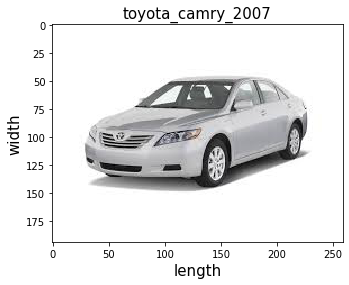

In [5]:
show_car_image('toyota_camry_2007', 15)

This image is 194 pixels wide by 259 pixels high and three channels for red, green, and blue.

### Flip Image

In [7]:
# load image
car_image_2 = Image.open('../images_and_gifs/Dodge_charger_2007.png')
# horizontal flip
hoz_flip = car_image_2.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = car_image_2.transpose(Image.FLIP_TOP_BOTTOM)

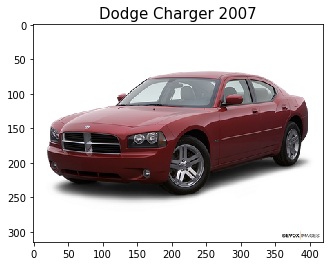

In [8]:
pyplot.title("Dodge Charger 2007", fontsize = 15);
pyplot.imshow(car_image_2)

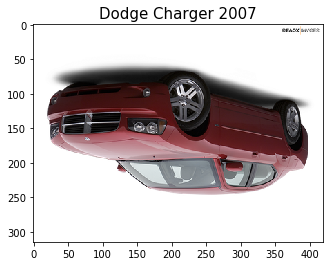

In [9]:
pyplot.title("Dodge Charger 2007", fontsize = 15);
pyplot.imshow(ver_flip)

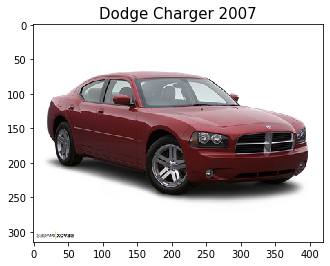

In [10]:
pyplot.title("Dodge Charger 2007", fontsize = 15)
pyplot.imshow(hoz_flip)

### Rotate Image

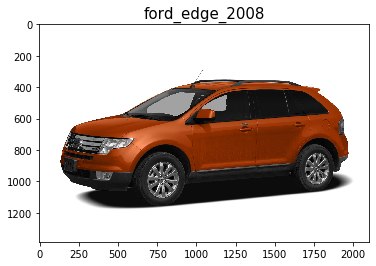

In [11]:
image_rotate('ford_edge_2008', 15, 0)

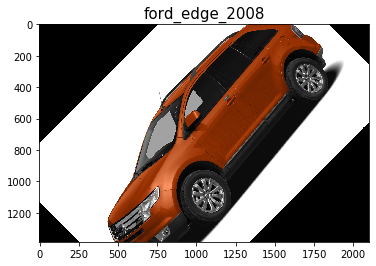

In [12]:
# rotate 45 degrees
image_rotate('ford_edge_2008', 15, 45)

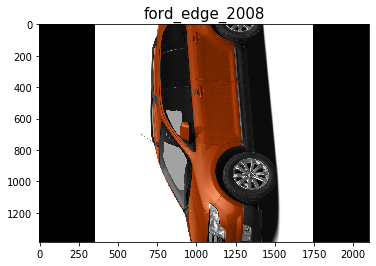

In [13]:
# rotate 90 degrees
image_rotate('ford_edge_2008', 15, 90)

### Car Images with different enviornment 

Since we intend to mitigate few challenges we have in our exciting vehicle recognition system, we have included images of cars in different environments such as car images taken into outdoor, car images with shadows and reflections, and images of cars with similar external styles from same manufacturers  

#### *Images taken into outdoor*

Image shape (width, length, and channel): (450, 600, 3)


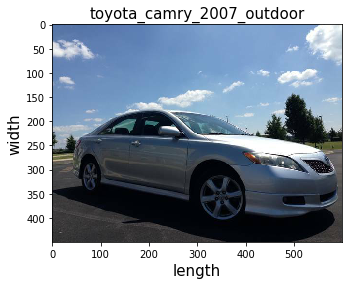

In [14]:
show_car_image('toyota_camry_2007_outdoor', 15)

Images taken in the outdoor environment includes lots of other background things. For instance, the images we used for showcasing the flips and rotation have no backgrounds and mostly taken in an indoor environment. However, this image with an outdoor environment includes other kinds of stuff as well (e.g. trees, sky, roads). This is always a challenge for a model to separate the car from other surroundings.

#### *Shadows and reflections in captured images*

Image shape (width, length, and channel): (450, 600, 3)


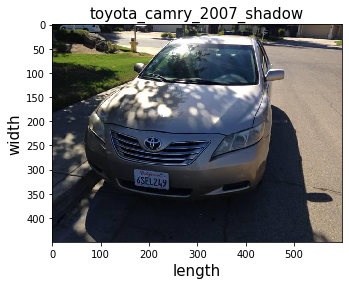

In [16]:
show_car_image('toyota_camry_2007_shadow', 15)

This refers to the images where the car is in shadow or have reflections. We see that in this image the car stands under the shadow of a tree. There might be situations when we have to detect a car with such shadows and its kind of a challenge for a vehicle recognition system to detect a car with such shadow.   

#### *Visual similarities between different models of the same manufacturer*

Image shape (width, length, and channel): (450, 600, 3)


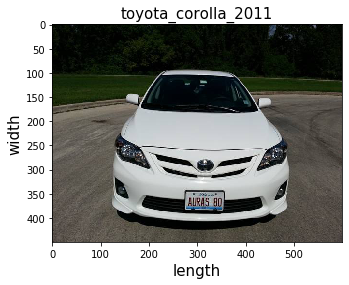

In [17]:
show_car_image('toyota_corolla_2011', 15)

Toyota has lots of models and each model has lots of variants. Sometimes there are visual similarities between different models of the same manufacturers. This is true for car brands. Sometimes, the differences between the models are insignificant and lie in detail. However, we have chosen to have Toyota Corolla 2011 model in our data to train our model the differences between models from the same manufacturers.

Moreover, we have also included Toyota Camry 2011 base models in our model as well to train the model the differences between the same model from the same manufacturers with different generations.

### Class counts

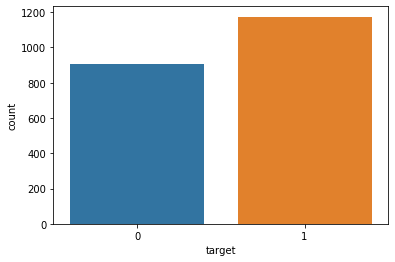

In [23]:
sns.countplot( x = data['target'], data = data)

Here we see the number of images we have per class. We have a little bit more images for our target class Toyota Camry 2007 than the images with random cars. Here 1 stands for images from Toyota Camry 2007 models and 0 stands for images from other models. The number of images for the Toyota Camry 2007 base model is 1174 and the number of images for random car models (not Toyota Camry 2007 base model) is 906.

## Helpful functions

In [24]:
#function to resize the image

def rezise_image(image_directory):
    for image in (os.listdir(image_directory)):
            image_dir = image_directory + '/' + image
            image = Image.open(image_dir)
            width, height = image.size # Stores image height and width as variables
            image = image.resize((150,150)) # Reshape images that are not 150 x 150 
            #image = image.convert('L') # Converts image to grayscale
            image.save(image_dir, optimize=True) 

In [21]:
#adopted and modified code from Mahdi Shadkam-Farrokhi

def graph_accuracy(history):
    '''
    Graphs the training and testing loss using the given History object from model training
    '''
    # Check out our train loss and test loss over epochs.
    train_accuracy = history.history['binary_accuracy']
    test_accuracy = history.history['val_binary_accuracy']
    xticks = np.array(range(len(train_accuracy)))
    # Set figure size.
    plt.figure(figsize=(6, 5))

    # Generate line plot of training, testing loss over epochs.
    plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')  #'#185fad' actually bright blue
    plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

    # Set title
    plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Crossentropy', fontsize = 18)
    plt.xticks(xticks[::5], (xticks+1)[::5])

    plt.legend(fontsize = 18);

In [20]:
#adopted code from Mahdi Shadkam-Farrokhi

def train_test_score(model_history):
    train_test_scores = list(zip(model_history.history['binary_accuracy'], model_history.history['val_binary_accuracy']))
    train_test_scores.sort(key=lambda scores: scores[1])
    print('train accuracy score and test accuracy score:', train_test_scores[-1])

In [10]:
#plotting augmented images
#reference https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(15,15))  #subplot with 1 row and 4 columns
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("../car_images/train_images/not_toyota_camry_2007/cadillac_cts_2006 (70).jpg")
#we have chosen to show cadillac-cts_2206 image for showing the image augmentation process

images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

## Model Preparation

To have all the images in our datatset in same size, we have resized all the images to 150 x 150. It's need to be noted that we are not resizing the images for the model. The resize aurgument for the model will be settiing later on. 

In [30]:
#running the function to resize the test images
car_list = ['not_toyota_camry_2007', 'toyota_camry_2007']

for car in car_list:
    car_directory = '../car_images/test_images/' + car
    rezise_image(car_directory)

In [31]:
#running the function to resize the train images

for car in car_list:
    car_directory = '../car_images/train_images/' + car
    rezise_image(car_directory)

We are setting some inputs for the models we would run below.

In [2]:
# dimensions of our images.
image_width, image_height = 150, 150
#setting image_width and image_height for the model to resize

train_data_directory = '../car_images/train_images'  #path from where the model will pull train images
test_data_directory = '../car_images/test_images'  #path from where the model will pull test images

nb_train_samples = 1352    
nb_test_samples = 494      
epochs = 48        
batch_size = 32     
input_shape = (image_width, image_height, 3)   #shapes of the images, 3 for RGB images

## Modelling

1. **Baseline Model**
2. **CNN model 1:**
    - CNN model with No transformation (original dataset)
3. **CNN model 2:** 
    - CNN model with augmented images - Rotated and Mirror transformed
    

## Baseline Model

The baseline model helps to evaluate the efficacy of our models. For classification analysis, there is no mean to predict, so a baseline classification model simply predicts the most frequently occurring class.

In [12]:
#creating csv file with list of all images of train set. 

toyota_camry_2007_images_train = os.listdir('../car_images/train_images/toyota_camry_2007')             
toyota_camry_2007_images_train = pd.DataFrame(toyota_camry_2007_images_train, columns = ['images'])
toyota_camry_2007_images_train['target'] = 1
toyota_camry_2007_images_train.to_csv('../car_images/toyota_camry_2007_images_train.csv')

not_toyota_camry_2007_images_train = os.listdir('../car_images/train_images/not_toyota_camry_2007')             
not_toyota_camry_2007_images_train = pd.DataFrame(not_toyota_camry_2007_images_train, columns = ['images'])
not_toyota_camry_2007_images_train['target'] = 0
not_toyota_camry_2007_images_train.to_csv('../car_images/not_toyota_camry_2007_images_train.csv')

data_train = toyota_camry_2007_images_train.append(not_toyota_camry_2007_images_train)

In [14]:
print('Baseline model accuracy on train set:', round(data_train['target'].value_counts(normalize=True).max()*100, 2),'%')

Baseline model accuracy on train set: 60.5 %


In [15]:
#creating csv file with list of all images of test set. 

toyota_camry_2007_images_test = os.listdir('../car_images/test_images/toyota_camry_2007')             
toyota_camry_2007_images_test = pd.DataFrame(toyota_camry_2007_images_test, columns = ['images'])
toyota_camry_2007_images_test['target'] = 1
toyota_camry_2007_images_test.to_csv('../car_images/toyota_camry_2007_images_test.csv')

not_toyota_camry_2007_images_test = os.listdir('../car_images/test_images/not_toyota_camry_2007')             
not_toyota_camry_2007_images_test = pd.DataFrame(not_toyota_camry_2007_images_test, columns = ['images'])
not_toyota_camry_2007_images_test['target'] = 0
not_toyota_camry_2007_images_test.to_csv('../car_images/not_toyota_camry_2007_images_test.csv')

data_test = toyota_camry_2007_images_test.append(not_toyota_camry_2007_images_test)

In [17]:
print('Baseline model accuracy on test set:', round(data_test['target'].value_counts(normalize=True).max()*100, 2),'%')

Baseline model accuracy on test set: 55.49 %


The baseline model has an accuracy of 60.5% on the train set and 55.49% on the test set. The difference between the accuracy on the train set and the test is not that wide. The accuracy of our baseline model is not so high and not at a satisfactory level. We would try a few different models and see if we could get better accuracy than the baseline model accuracy.

## Convolution Neural Network (CNN) Models

Before we run the models, here are some more specific explanations of the CNN model we would explore in later sections. The entire process of our CNN model is as below:

- ImageDataGenerator pulls the raw images directly from the image directory during the training and testing process. Each ImageDataGenerator is also responsible for normalizing the images and resizing the images to 150 x 150. However, we have already resized our images to this proportion, but still, we will use this argument in our *datagen_test(/train).flow_from_directory* the function just to get ensured that our model is getting same-sized images as input. ImageDataGenerator is also responsible for image scaling, as well as to apply the appropriate transformation for training test images. 

- These images are fed into an initial group of "Conv> Pooling > Dropout" layers
- Followed by four more implementations of the previous "Conv> Pooling > Dropout" pattern; the data are then flattened and fed into two Dense layers 

- And finally a single node output Dense layer

## CNN Model 1 (Original Images)

In [48]:
# Instantiate a CNN
cnn_model_1 = Sequential()

# Add a convolutional layer.
cnn_model_1.add(Conv2D(filters=32,  # Number of filters (num of copies in parallel)
            kernel_size=(3,3),      # Height/width of filter square matrix
            activation='relu',      # Activation function
            input_shape=input_shape #Shape of input (image)
            #padding = 'same',
            ))

cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))   # dimensions of region of pooling
cnn_model_1.add(Dropout(0.25))                   #regularization to avoid overfitting!

# Second convolutional layer
cnn_model_1.add(Conv2D(filters=128, kernel_size=4, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.25))

# Third convolutional layer
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size = (2,2)))
cnn_model_1.add(Dropout(0.2))

# Fourth convolutional layer
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.2))  #

# Fifth convolutional layer
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.2))     

# further Regularization to avoid overfitting
cnn_model_1.add(Dropout(0.2))  

# Flatten layer to pass through dense layer
cnn_model_1.add(Flatten())


# Densely connected layer
cnn_model_1.add((Dense(64, activation='relu'))) #Densely-Connected Layer: 64 neurons
cnn_model_1.add((Dense(32, activation='relu'))) #Densely-Connected Layer: 32 neurons

# Output layer 
cnn_model_1.add(Dense(1, activation='sigmoid'))  #sigmoid activation as its binary classification

In [49]:
#Compile model
cnn_model_1.compile(loss='binary_crossentropy',  #binary_crossentrpy for binary classification
              optimizer='adam',                #Speeds up learning rate, adaptive moment estimation
              metrics=['binary_accuracy'])  ## Classification metric


In [50]:
datagen_train = ImageDataGenerator(rescale=1. / 255,       #rescaling
                                   #rotation_range= 0,
                                   #width_shift_range=0.3,
                                   #height_shift_range=0.3,
                                   #zoom_range=0.3,
                                   #shear_range=0.3,
                                   horizontal_flip=False,  #setting no horizontal flip
                                   vertical_flip=False,    ##setting no vertical flip
                                   fill_mode='nearest')    #default setting

train_generator = datagen_train.flow_from_directory(
                                                    train_data_directory,
                                                    target_size=(image_width, image_height),
                                                    #batch_size=batch_size,
                                                    color_mode = 'rgb',   #color image
                                                    class_mode='binary', 
                                                    shuffle = True,
                                                    seed = RANDOM_STATE)  #seeds for repoductibility


Found 1552 images belonging to 2 classes.


In [51]:
datagen_test = ImageDataGenerator(rescale=1. / 255)   # only rescaling for test images

test_generator = datagen_test.flow_from_directory(
                test_data_directory,               #path to the target directory
                target_size=(image_width, image_height),  #The dimensions to which all images found will be resized.
               # batch_size=batch_size,            #Size of the batches of data 
                class_mode='binary',              #classification type
                color_mode = 'rgb',               #color mode: rgb/grayscle/rgba
                shuffle = False)                # Whether to shuffle the data, True or False


Found 528 images belonging to 2 classes.


In [52]:
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

# Fit model on training generator
history_1 = cnn_model_1.fit_generator(
                                    train_generator,
                                    #steps_per_epoch=nb_train_samples // batch_size,
                                    epochs=epochs,
                                    validation_data=test_generator,
                                    #validation_steps=nb_test_samples // batch_size,
                                    verbose=0)



In [53]:
#checking model summary
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 128)       65664     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 32)       

We see that our model uses over 130,000 parameters. Most of the parameters come from the second convolutional layer of the model. Since we used the by default 'Valid' padding we see the are some reduction of the inputs, and the major feature reductions are done by the Maxpooling.

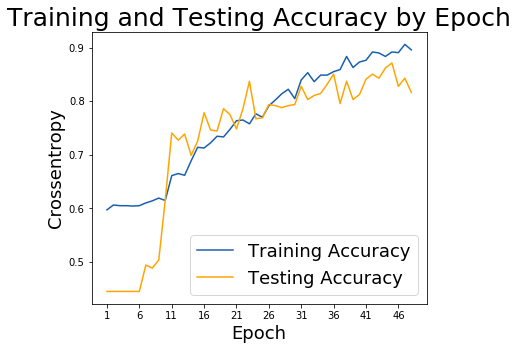

In [55]:
#plotting model accuracy

graph_accuracy(history_1)

In [54]:
#comparing accuracy scores on train set and test set

train_test_score(history_1)

train accuracy score and test accuracy score: (0.8917526, 0.8712121248245239)


Since I have set my metric to accurcay, I would investigate the accuracy score of the models. According to theory, the more accuracy score the better. For classificatioon problems, accuracy refers to the rate of correct predictions.  

We can see that the training accuracy and test accuracy were ups and down through the epochs. From 16 to 32ish epochs the accuracy scores on both train and test set were more or less close enough. Afterward, it started to get slightly wider. However, in the end, the accuracy scores on both train and test set turned back to each other, and eventually, we got the best fitting accuracy score. The accuracy score at 48th Epoch was **89.2% on the train set and 87.1% on test set**. Which is acceptable and perfect. We will evaluate the model performances afterward if we find it as the ultimate best model with the highest accuracy rate. We will also try the CNN model with augmented images to see if it increases the accuracy score even further.

In [61]:
#saving the cnn model
cnn_model_1.save_weights('../model/best_cnn_model.h5')

## CNN Model 2 (Augmented Images)

In this model, we will augment the images to investigate how the model performs with augmented images. We have used several augmented arguments in this model. 

- We have set rotation ranges 30 degree which implies that the model will rotate the images between 0 to 30 degrees. 

- Then we did the Horizontal and Vertical Shift Augmentation. The 'width_shift_range' and 'height_shift_range' arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shifts respectively. A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically while keeping the image dimensions the same. This implies that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

- Then we flipped the images vertically and horizontally.

- We also played with the brightness and darkness of the images. In this range values, less than 1.0 darken the image,  whereas values larger than 1.0 brighten the image.

- We also used zoom augmentation which randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

- we used shear transformation which slants the shape of the image

Reference: [6][7]

We have already showcased some of the augmentation samples in our elementary EDA chapter. However, I want to present a few more augmentation samples to give an immediate idea of how the augmentation works in the model. Below a few examples are presented.

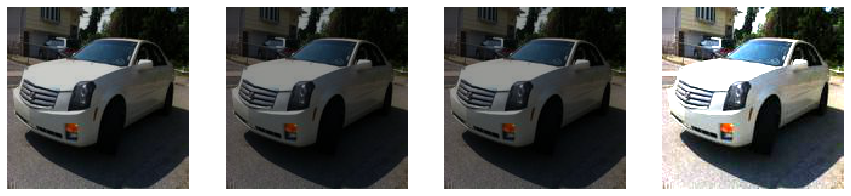

In [12]:
#Brightness Augmentation

data_generator = ImageDataGenerator(brightness_range=(.5, 2.))
plot(data_generator)

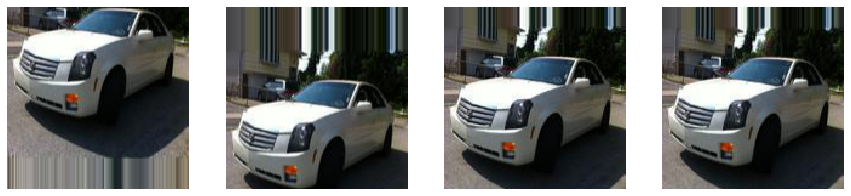

In [16]:
#height_shift Augmentation

data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator)

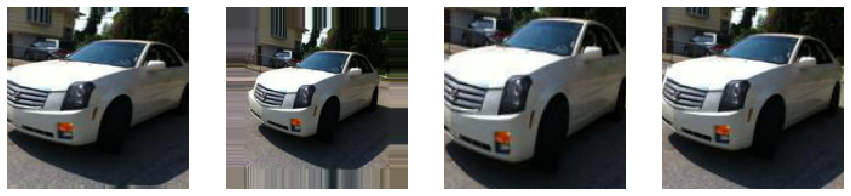

In [14]:
#Zoom Augmentation

data_generator = ImageDataGenerator(zoom_range=.30)
plot(data_generator)

Now let's run the model and see if we get any better accuracy score than our previous model

In [13]:
## Instantiate a CNN
cnn_model_2 = Sequential()

#Add a convolutional layer
cnn_model_2.add(Conv2D(filters=32,     # Number of filters (num of copies in parallel)
            kernel_size=(3,3),         # Height/width of filter square matrix
            activation='relu',         # Activation function
            input_shape=input_shape   #Shape of input (image)
            #padding = 'same',
            ))

cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))    # dimensions of region of pooling
cnn_model_2.add(Dropout(0.25))                    # #regularization to avoid overfitting!

# # Second convolutional layer
cnn_model_2.add(Conv2D(filters=128, kernel_size=4, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.25))

# Third convolutional layer
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size = (2,2)))
cnn_model_2.add(Dropout(0.2))

# Fourth convolutional layer
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.2))

# Fifth convolutional layer
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.2))

# further Regularization to avoid overfitting
cnn_model_2.add(Dropout(0.2))

# Flatten layer to pass through dense layer
cnn_model_2.add(Flatten())


# Densely connected layer
cnn_model_2.add((Dense(64, activation='relu')))   #Densely-Connected Layer: 64 neurons
cnn_model_2.add((Dense(32, activation='relu')))   #Densely-Connected Layer: 32 neurons

# Output layer 
cnn_model_2.add(Dense(1, activation='sigmoid'))   #sigmoid activation as its binary classification

In [14]:
#compile model
cnn_model_2.compile(loss='binary_crossentropy',  #binary_crossentrpy for binary classification
              optimizer='adam',
              metrics=['binary_accuracy'])


In [15]:
# This is the augmentation configuration to use for training
datagen_train = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range= 30,   
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range = [.5, 2.],
                                   fill_mode='nearest')

train_generator = datagen_train.flow_from_directory(
                                                    train_data_directory,
                                                    target_size=(image_width, image_height),
                                                    batch_size=batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode='binary',
                                                    shuffle = True,
                                                    seed = RANDOM_STATE)


Found 1552 images belonging to 2 classes.


In [16]:
datagen_test = ImageDataGenerator(rescale=1. / 255)     # only rescaling for test images

test_generator = datagen_test.flow_from_directory(
                                                test_data_directory,
                                                target_size=(image_width, image_height),
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                color_mode = 'rgb',
                                                shuffle = False
                                                )


Found 528 images belonging to 2 classes.


In [17]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

history_2 = cnn_model_2.fit_generator(
                                    train_generator,
                                    steps_per_epoch=nb_train_samples // batch_size,
                                    epochs=epochs,
                                    validation_data=test_generator,
                                    validation_steps=nb_test_samples // batch_size,
                                    callbacks=[early_stop],   #further Regularization to avoid overfitting
                                    verbose=0)    # 1 if want list of scores



In [18]:
#checking model summary
cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 128)       65664     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 32)       

We used the same layer structure as the previous one and hence all the params results are similar to the last one. We have a total of 132,321 numbers of params and most of them came from the 2nd convolutional layer.

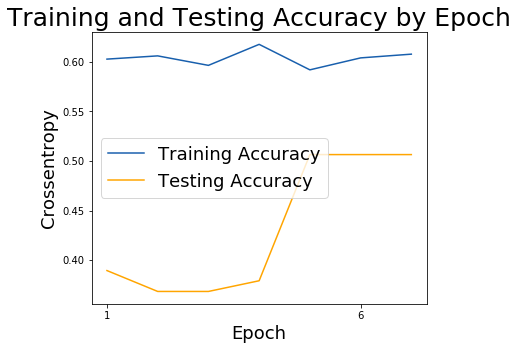

In [23]:
#plotting accuracy scores
graph_accuracy(history_2)

In [22]:
#comparing accuracy score on both train and test set
train_test_score(history_2)

train accuracy score and test accuracy score: (0.60768074, 0.506465494632721)


The accuracy scores suggest that the model doesn't perform well at all. Moreover, the model is overfitted; the distance between the accuracy score on the train set and the test set very wide.  

There are few explanations why this CNN model with augmentation didn’t work well. For example, if you see the brightness augmentation samples above, you will see that it blurs or hides some of the key identities of the cars, such as the brand logos and few very specific details of the edges, lighting styles. Well, almost all the cars we have chosen for this experiment, are sedan, and passenger cars. Although they might differ slightly in size(length, width), and other features,  in images the exterior structure or chassis might be close enough for few models. Moreover, in our data, we have car images from the same manufacturers and also the same model with different generations( e.g. Toyota Camry 2014 base model and Toyota Corolla 2011). However, what differentiates them is the brand logos and the brand names at the rear of the cars. So, if these features got lost or got hid in the images it might be hard for the machine to train themselves and afterward predict the right ones. Besides, details are also important to guess/predict the right vehicle make and model in some cases and for a few car models, the differences are in detail. again, in the same manner, few of the details might get lost in some augmentation process. Moreover, flips and rotations are might not be realistic. Like it's very rare to picture a car vertically or horizontally flipped!! So, the car images with other backgrounds might be representing misleading features for some augmentations process. Remember the augmentation is done on train image sets alone. So, trained on augmented images will fewer details and less interpretable features might not delivery better predictions. 

However, we are not concluding that augmented images would always give us poor accuracy. perhaps, with more images we can get better scores as then the model would have enough data to be trained on the details of each car models.

## Model Selection

Our chosen metric accuracy takes into account all true predictions, both true positives and true negatives. The equation is as below:

$$
Accuracy = \frac{All\ Correct}{All\ Predictions}
$$

$$
= \frac{(TP + TN)} {(TP + FP + TN + FN)}
$$


|__Model__|__Accuracy Score on train set__|__Accuracy Score on test ser__|
|:---|:---:|:---:|
|`BaseLine Model`|__60.5%__|__55.49%__|
|`CNN Model 1`|__89.2%__|__87.1%__|
|`CNN Model 2`|__60.8%__|__50.6%__|



We can see that CNN model 1 has a far better accuracy rate than CNN model 2 and baseline model. **CNN model 1 has accuracy of 89.2% on the train set and 87.1% on the test set**.Moreover, the accuracy rates on the test and train sets suggest that it is not an overfitted or underfired model. CNN model 1 is the CNN model with the original image dataset. Based on the results we can conclude that in our study the CNN model with original images performs better than the CNN model with augmented images and evidently from the baseline model. Therefore, **we have selected the CNN model with original images** for further evaluation.

## Model Evaluation

### Investigating model missclassifications

Now let's Investigate further the model we have selected. In this chapter, we would investigate the misclassified images and would showcase the visuals of the activation layers briefly. At first, we would figure out the images that our model has predicted wrong. In other words, we would calculate the total amount of False Negatives and False Positives. In our study, False Positive refers to the observations that our model predicted as Toyota Camry 2007 but they were not Toyota Camry 2007 when False Negative refers to the observations that our model predicted as not Toyota Camry 2007 but actually, they were Toyota Camry 2007.

In [56]:
test_generator.reset()

_preds = cnn_model_1.predict_generator(test_generator)
preds = (_preds >= .5).astype(int).flatten()

orig_preds = pd.DataFrame({
    "images"       : test_generator.filenames,
    "actual" : test_generator.classes,
    "pred"       : preds
})

orig_missed = orig_preds[orig_preds["actual"] != orig_preds["pred"]]
orig_missed.shape

(97, 3)

We see that we have 97 misclassified images, which means 97 observations were predicted wrong. Let's investigate further and see what images were predicted wrong and why those were predicted wrong. We would select a few images from the below dataframe and would try to comprehend actually what went wrong.

In [59]:
missclassified_images = orig_preds[orig_preds['actual'] != orig_preds['pred']]

In [60]:
missclassified_images

,images,actual,pred
1,not_toyota_camry_2007\1 (83).jpg,0,1
3,not_toyota_camry_2007\1 (85).jpg,0,1
4,not_toyota_camry_2007\1 (86).jpg,0,1
11,not_toyota_camry_2007\2 (10).jpg,0,1
12,not_toyota_camry_2007\2 (11).jpg,0,1
...,...,...,...
293,toyota_camry_2007\toyota_camry_2007 (10).jpg,1,0
314,toyota_camry_2007\toyota_camry_2007 (274).jpg,1,0
337,toyota_camry_2007\toyota_camry_2007 (33).jpg,1,0
339,toyota_camry_2007\toyota_camry_2007 (35).jpg,1,0


#### False Negative 

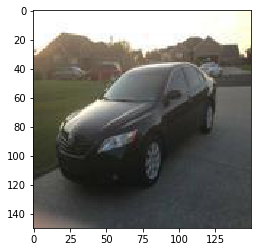

In [20]:
images = image.imread('../car_images/test_images/toyota_camry_2007/toyota_camry_2007 (33).jpg')
pyplot.imshow(images)

One odd about this image is lighting(brightness of the sun), and shadows. The background bright sun created some kind of shadows and darkness when the picture was taken. Besides, the background cars -  there are three more cars in the background. So, It's understandable why the model couldn't predict it correctly.

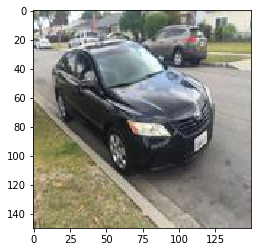

In [21]:
images = image.imread('../car_images/test_images/toyota_camry_2007/toyota_camry_2007 (274).jpg')
pyplot.imshow(images)

There are more cars in the background. So, it's undestandable that why the model missclassified this image.

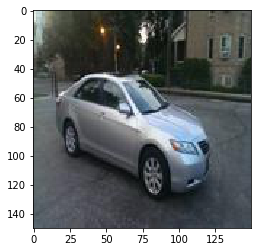

In [26]:
images = image.imread('../car_images/test_images/toyota_camry_2007/toyota_camry_2007 (4).jpg')
pyplot.imshow(images)

The glass roof of the car - the Toyota Camry 2007 base model doesn't have a glass rooftop. It's Toyota Camry 2007 base model, however, it might be that the car owner has done some kind of customization on the base model. This misclassification points out how a small change or how a change in style/outlook detail can impact the model train and prediction.  

#### False Positive

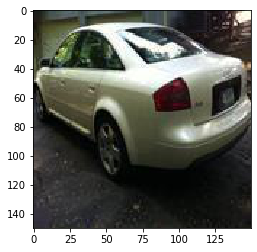

In [39]:
images = image.imread('../car_images/test_images/not_toyota_camry_2007/1 (86).jpg')
pyplot.imshow(images)

It is an Audi car and our model predicted it as a Toyota Camry 2007 model. It's really hard to explain why the prediction went wrong. We suspect that the angle of the car could be the reason. Except for the rear/tail light, no other details that could distinguish this car from Toyota Camry 2007 base model are visible. As I already mentioned, this is one of the challenges - there are similarities between different models from different manufacturers. So, we would suspect that due to the angle of this image, the model couldn't extract that much information that can distinguish the Toyota Camry and other cars with more or less similar exterior style.

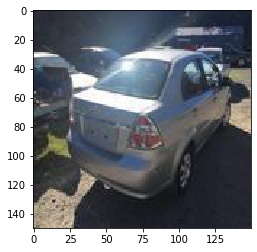

In [43]:
images = image.imread('../car_images/test_images/not_toyota_camry_2007/2 (10).jpg')
pyplot.imshow(images)

Once again it's surprising why the model predicted it as Toyota Camry 2007. However, if you see the design of the back-side of this Ford model (except the rear/tail light) you might notice that it is pretty close to the design of the back-side of Toyota Camry 2007. Having said we also suspect that the lighting(spark of the sunlight), angle of the car, and the nearby other cars in the image are the reasons behind the wrong prediction. 

Both the False positive predict points out the challenges of predicting vehicles with similar visuals from different manufacturers

### CNN Activation visualization

In [72]:
#adopted code from Mahdi Shadkam-Farrokhi

def show_layers(activations, ith_image, ith_layer, title = "Title", n_cols = 8, img_h = 2.5, img_w = 2, subset = None, artist = None,**kwargs):
    '''Plots all images for each filter in the give activations layer'''
    num = subset or activations[ith_layer].shape[3]
    n_rows = int(np.ceil(num/n_cols))

    f, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize= (img_w * n_cols, img_h * num / n_cols))
    for i in range(num):
        ax = axes[i//n_cols][i%n_cols] if not subset else axes[i]
        ax.matshow(activations[ith_layer][ith_image,:,:, i])
        ax.set_title(f"Filter #{i+1}", pad = 0)
        ax.tick_params(bottom = False, left = False, top=False, labeltop = False, labelbottom = False, labelleft = False)     
        if artist:
            artist(ax)
    while not subset and i < n_cols * n_rows -1:
        i += 1
        f.delaxes(axes[i//n_cols][i%n_rows])
    f.suptitle(title, fontsize = 24, y = kwargs.get("y") or .94)

In [73]:
classifier = cnn_model_1
len(classifier.layers)

20

We have all togther 20 layers including the convolutional layers, pooling layers, dropouts, flatten layer and dense layers.

In [76]:
img_path = '../car_images/test_images/toyota_camry_2007/toyota_camry_2007.jpg'
img = image.load_img(img_path, target_size=(150, 150, 3))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(img_tensor) 

In [77]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels. Now let's plot the 4th channel of the activation of the first layer of the orginal model.

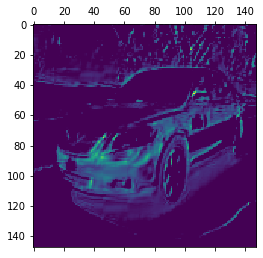

In [79]:
#plotting the 4th channel of the activation of the first layer of the orginal model. 

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

To understand how the layers of the CNN model works, we will explore the layers furthers and it would also give us a brief idea of how each layer in a CNN model works.  

The first convolutional layer interprets each pixel of the image as a number when it gets an image input. The layer typically reduces the complexity of the image by altering the image data, and then pass it onto the next layer. Each layer maintains a set of unique interpretations of the image which store different information of the images - these interpretations are called 'filters'. In another way of saying, one filter may consider ‘bumper’ in an image as important while another filter may consider ‘front light’ as an important feature. The importance is denoted in the model as weights which are simply numbers each filter has associated with each pixel in the image - the higher the number, the more important the pixel. It needs to be noted that the filter of one convolutional layer is different than the filter of another convolutional layer, which means the filters from one layer have no connection with the filters in another. For example, filter #2 in 1st convolutional layer has nothing to do with filter #2 in 2nd or 3rd convolutional layer.


Below we will use heatmaps of a few layers to explain what the filters of each layer interpret of the input images. A heatmap is like an overlay of an image that denotes importance through color. In essence, the brighter the area, the more important the filter considers that area. The darker the area, the less important.

_reference: Mahdi Shadkam-Farrokhi_


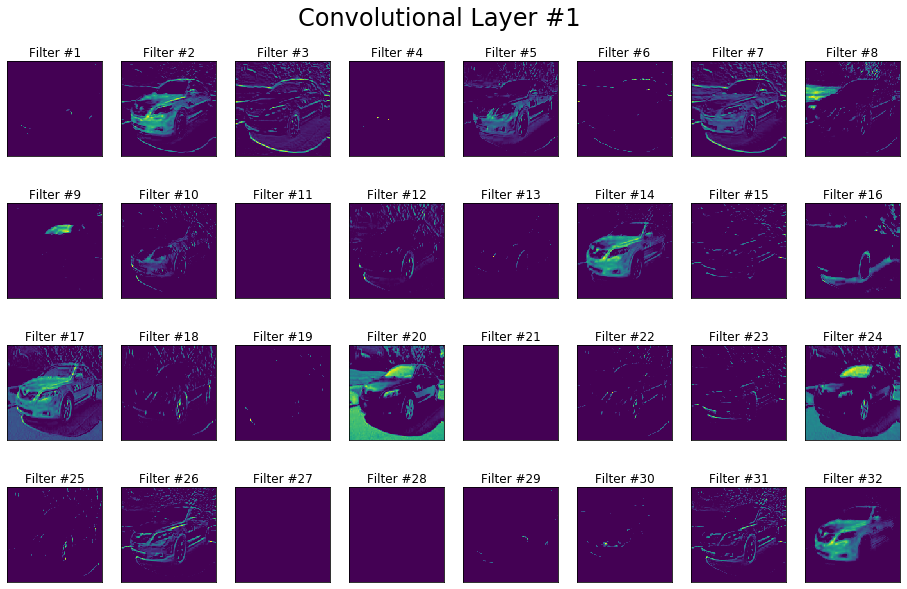

In [80]:
show_layers(activations, 0, 0, title = "Convolutional Layer #1")

We see that filter #2, #14, #26 #32 focuses on the car body. Some of the filters are dark such as #11 #21, #27, #28 meaning these filters are not active (at least not for this image)  and left blank which may suggest we could reduce the number of filters for the 1st convolutional layer without losing much if any, data. However, we see that at this stage, the activations retain almost all of the information present in the image.

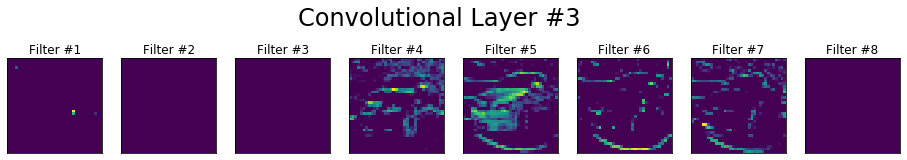

In [81]:
show_layers(activations, 0, 4, subset = 8, title = "Convolutional Layer #3", **{"y": 1.05})

The first layer arguably retains the shape of the car despite the fact the few filters were not activated and were left blank. However the deeper we go in the layers, we go deeper in the layers, the activations become increasingly abstract and less visually interpretable. The deeper layers begin to encode higher-level concepts such as single borders, corners, and angles. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.

## Conclusion

Based on the results, we see that the CNN model with original images (without augmentations) performs better than other models. This means that The CNN model with original images predicts the highest number of observations correctly. The selected CNN model has managed to get an **accuracy of 89.2% on the train set and 87.1% on the test set**. In this study, our model classifies whether an observation is Toyota Camry 2007 base model or not. The input of our CNN models were raw images of cars. The investigation on the misclassification images provides some insights that we need to take into account for further improvement of the accuracy score.  

## Recommendation

We have managed to build a model with around 87.1% accuracy, which is a pretty good result. Based on this result, we could start using the model for our intended purposes and take it to the next level. We have trained the model for binary classifications. We should take the insights from this study and take the next step to extend the model to train multi-classifications for vehicle makes and models. 

Besides, 12.7% misclassifications might be a problem if we want to predict or surveil millions of cars. Therefore, we have some recommendations to improve the accuracy even further, to take it to close to 100%.

   -  We need more images. There is no alternative to having a large number of images to get better accuracy in the CNN model. Car is a very complex object and has lost of details. Hence, to train our model better we need images of around thousands. It would better if can get thousands of images for each feature (e.g. thousands of images of the wheels alone, thousands of images of the rear mirror alone) and different angles or views (e.g.thousands of images for front view, thousands of images for back view). We need a large number of images for both target and non-target classes. 

   - If possible we could feed high-resolution images as input to the models. So, it might help the model to extract the details of the cars.

   - Images with fewer surroundings might be much better input, but if we want to predict a vehicle with other surroundings in real-time we need to feed the model with a large number of such images.   

## Prediction

In [65]:
#function for prediction
# [12] adopted and modified code from towardsdatascience blogpost on visualizing intermediate activation in CNN with keras

def prediction(path, car,model):
    img_path = '../car_images/test_images/' + path+ '/' + car + '.jpg'
    img = image.load_img(img_path, target_size=(150, 150, 3))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.imshow(img_tensor[0])
    plt.show()
    print(img_tensor.shape)
    
    # predicting images
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    print("Predicted class is:",classes)# predicting images

Let's see how our model is effective in solving the challenges we discussed in the problem statement. In this section, we will input car images from our test data and see if our selected model can predict it correctly. We would test our model with Toyota Camry 2007, and other random cars, car models from the same manufacturer (Toyota) and car images where the car is in shadow. The classes are as follows:

- Class 1 : Toyota Camry 2007
- Class 0 : not Toyota Camry 2007

#####  Toyota camry 2007

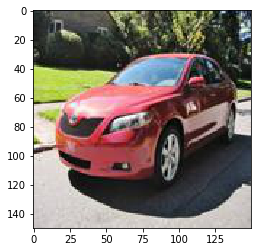

(1, 150, 150, 3)
Predicted class is: [[1]]


In [66]:
prediction('toyota_camry_2007','toyota_camry_2007', cnn_model_1)

The predicted class is 1 and thus the model has predicted the car correctly. Now try with a similar color car from a random model, and see if the model can perform correctly.

##### Random cars model

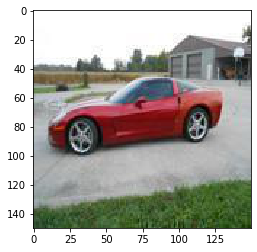

(1, 150, 150, 3)
Predicted class is: [[1]]


In [67]:
prediction('not_toyota_camry_2007','chevrolet_covette_2005 (30)', cnn_model_1)

Misclassified! We suspect that our model couldn't get enough information from this side-view of the car to distinguish it from the Toyota Camry 2007 model. The model predicted wrong this time. let's try any other red cars and see if our model can predict correctly.

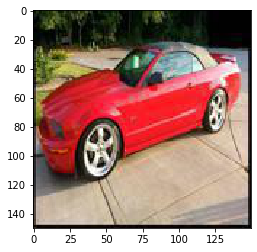

(1, 150, 150, 3)
Predicted class is: [[0]]


In [68]:
prediction('not_toyota_camry_2007','3 (87)', cnn_model_1)

Classified as 0, which is correct. It's not a Toyota Camry 2007 model.

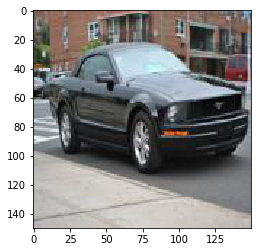

(1, 150, 150, 3)
Predicted class is: [[0]]


In [69]:
prediction('not_toyota_camry_2007','3 (83)', cnn_model_1)

Classified as 0, which is correct. It's not a Toyota Camry 2007 model.

##### Car model from same manufacturer

Now let's see how good our model is at distingusing models from same manufacturer.

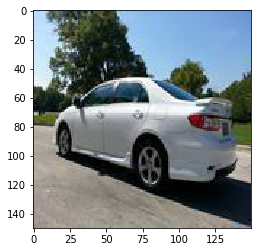

(1, 150, 150, 3)
Predicted class is: [[0]]


In [70]:
prediction('not_toyota_camry_2007','toyota_corolla_2011 (16)', cnn_model_1)

Classified as 0, which is correct. It's not a Toyota Camry 2007 model, it's Toyota Corolla 2011 model.

##### Toyota Camry 2007 model in shadows

Let's see how our model good at predicting ToyOta camry 2007 even is stand under a tree shadow and refelctions.

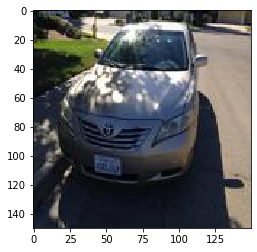

(1, 150, 150, 3)
Predicted class is: [[1]]


In [71]:
prediction('toyota_camry_2007','toyota_camry_2007_394', cnn_model_1)

Classified 1 ! Our selected model perfectly predicted the Toyota Camry 2007 model.

## Reference

- [1] [Keras](https://keras.io/api/preprocessing/image/)

- [2] [Danqing Liu](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7#:~:text=ReLU%20stands%20for%20rectified%20linear,a%20type%20of%20activation%20function.&text=ReLU%20is%20the%20most%20commonly,usually%20a%20good%20first%20choice)

- [3] [Jason Brownlee](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)
- [4] [Pranoy Radhakrishnan](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)
- [5] [Jason Brownlee](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20sigmoid%20activation%20function%2C%20also,value%20between%200.0%20and%201.0.)
- [6] [Sumit Sarin](https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844)
- [7] [Jason Brownlee](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)
- [8] [vmmrdb](http://vmmrdb.cecsresearch.org/)
- [9] [Real-Time Vehicle Make and Model Recognition System](https://www.mdpi.com/2504-4990/1/2/36/pdf)
- [10] [Autolist](https://www.autolist.com/toyota-camry/toyota-camry-generations)
- [11] [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
- [12] [Activation layer visualization](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0#:~:text=Visualizing%20intermediate%20activations%20consists%20of,output%20of%20the%20activation%20function)